In [2]:
from google.colab import files
uploaded = files.upload()


Saving credit fraud detection.zip to credit fraud detection.zip


In [5]:
import zipfile

with zipfile.ZipFile("credit fraud detection.zip", 'r') as zip_ref:
    zip_ref.extractall("creditcard_data")

In [6]:
import pandas as pd

# Load CSV
df = pd.read_csv("creditcard_data/creditcard.csv")

# View basic info
print("Dataset shape:", df.shape)
print(df.head())
print("\nClass distribution:\n", df['Class'].value_counts())

Dataset shape: (284807, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

    

In [7]:
from sklearn.preprocessing import StandardScaler

# Separate fraud and non-fraud
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0].sample(n=10000 - len(fraud), random_state=42)

# Combine and shuffle
df_sampled = pd.concat([fraud, non_fraud]).sample(frac=1, random_state=42)

# Features and labels
X = df_sampled.drop(columns=['Class'])
y_true = df_sampled['Class']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
from sklearn.ensemble import IsolationForest
import numpy as np

# Fit Isolation Forest
iso_forest = IsolationForest(contamination=len(fraud)/len(df_sampled), random_state=42)
y_pred_if = iso_forest.fit_predict(X_scaled)

# Convert predictions to 0/1
y_pred_if = np.where(y_pred_if == -1, 1, 0)

In [9]:
from sklearn.svm import OneClassSVM

# Fit One-Class SVM
oc_svm = OneClassSVM(nu=len(fraud)/len(df_sampled), kernel='rbf', gamma=0.1)
y_pred_svm = oc_svm.fit_predict(X_scaled)

# Convert predictions to 0/1
y_pred_svm = np.where(y_pred_svm == -1, 1, 0)

=== Isolation Forest ===
Confusion Matrix:
 [[9326  182]
 [ 182  310]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      9508
           1       0.63      0.63      0.63       492

    accuracy                           0.96     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.96      0.96      0.96     10000



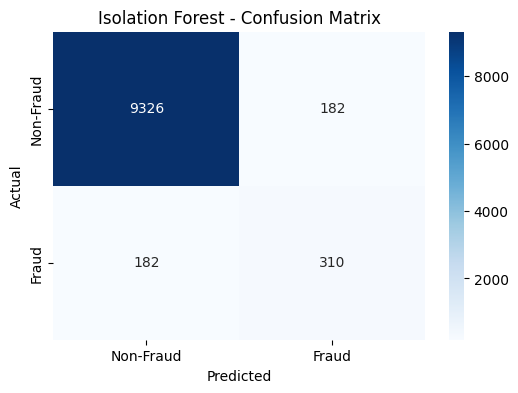

=== One-Class SVM ===
Confusion Matrix:
 [[9132  376]
 [ 344  148]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      9508
           1       0.28      0.30      0.29       492

    accuracy                           0.93     10000
   macro avg       0.62      0.63      0.63     10000
weighted avg       0.93      0.93      0.93     10000



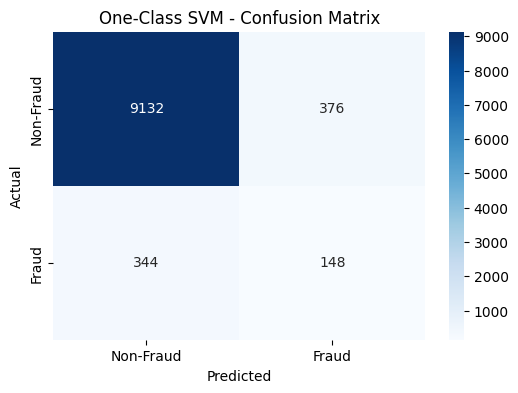

=== Isolation Forest ===
Confusion Matrix:
 [[9326  182]
 [ 182  310]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      9508
           1       0.63      0.63      0.63       492

    accuracy                           0.96     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.96      0.96      0.96     10000



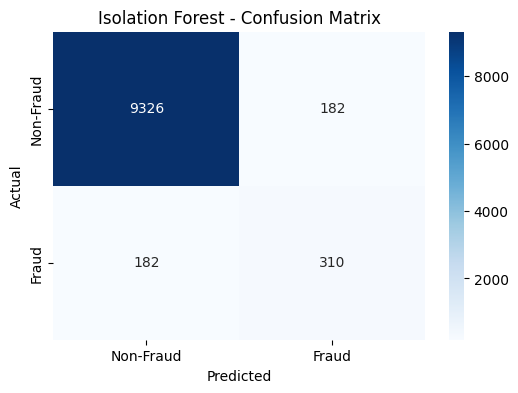

=== One-Class SVM ===
Confusion Matrix:
 [[9132  376]
 [ 344  148]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      9508
           1       0.28      0.30      0.29       492

    accuracy                           0.93     10000
   macro avg       0.62      0.63      0.63     10000
weighted avg       0.93      0.93      0.93     10000



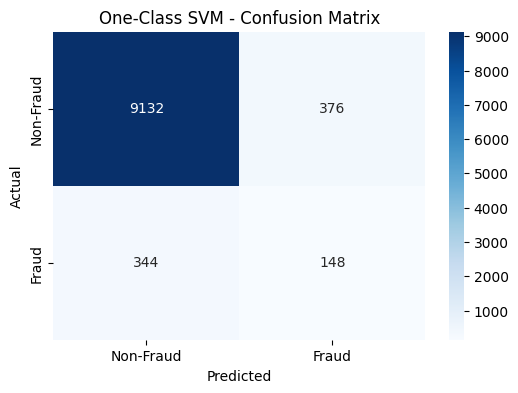

In [10]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Print text report
def evaluate_model(y_true, y_pred, model_name):
    print(f"=== {model_name} ===")
    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:\n", cm)
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

# Plot heatmap
def plot_conf_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    labels = ["Non-Fraud", "Fraud"]
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Evaluate and plot both models
evaluate_model(y_true, y_pred_if, "Isolation Forest")
plot_conf_matrix(y_true, y_pred_if, "Isolation Forest")

evaluate_model(y_true, y_pred_svm, "One-Class SVM")
plot_conf_matrix(y_true, y_pred_svm, "One-Class SVM")
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Print text report
def evaluate_model(y_true, y_pred, model_name):
    print(f"=== {model_name} ===")
    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:\n", cm)
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

# Plot heatmap
def plot_conf_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    labels = ["Non-Fraud", "Fraud"]
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Evaluate and plot both models
evaluate_model(y_true, y_pred_if, "Isolation Forest")
plot_conf_matrix(y_true, y_pred_if, "Isolation Forest")

evaluate_model(y_true, y_pred_svm, "One-Class SVM")
plot_conf_matrix(y_true, y_pred_svm, "One-Class SVM")